# A primer on the normal distribution

## Introduction
New students in science and mathematics may have seen a figure such as the one below. 

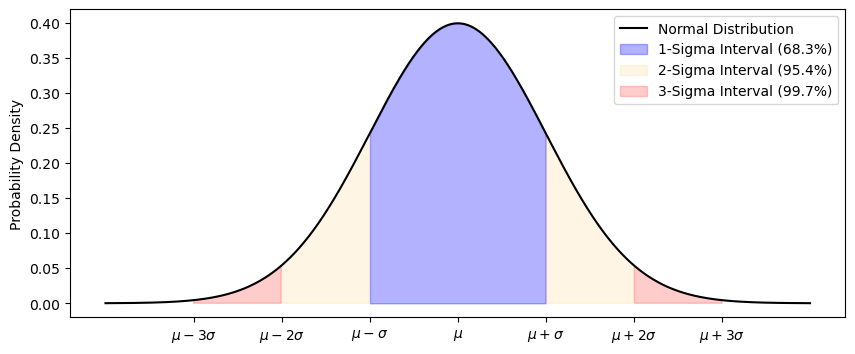

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu,sigma = 0,1

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma) #gaussian pdf

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Normal Distribution',color='k')

plt.fill_between(x, y, where=np.abs(x-mu) <= sigma, color='blue', alpha=0.3, label='1-Sigma Interval (68.3%)')
plt.fill_between(x, y, where=np.logical_and(np.abs(x-mu) <= 2*sigma,np.abs(x-mu) > sigma), color='orange', alpha=0.1, label='2-Sigma Interval (95.4%)')
plt.fill_between(x, y, where=np.logical_and(np.abs(x-mu) <= 3*sigma,np.abs(x-mu) > 2*sigma), color='red', alpha=0.2, label='3-Sigma Interval (99.7%)')

# Set xticks to mu, mu+/-1sigma, mu+/-2sigma, mu+/-3sigma
xticks = [mu - 3*sigma, mu - 2*sigma, mu - sigma, mu, mu + sigma, mu + 2*sigma, mu + 3*sigma]
xticklabels = [r'$\mu-3\sigma$', r'$\mu-2\sigma$', r'$\mu-\sigma$', r'$\mu$', r'$\mu+\sigma$', r'$\mu+2\sigma$', r'$\mu+3\sigma$']
plt.xticks(xticks, xticklabels)

plt.ylabel('Probability Density')
plt.legend()

plt.show()


This figure illustrates the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), also known to as the [Gaussian distribution](https://en.wikipedia.org/wiki/Gaussian_function), which is a fundamental concept in statistics and probability theory. The normal distribution is characterized by its bell-shaped curve, as we can see above, that is symmetric around its mean, $\mu$, and has a "bandwitdh'' proportional to its variance $\sigma^2$. The form of the curve above is written as
$$ p(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \doteq \text{Normal}(x|\mu,\sigma) \ . \quad \quad (1) $$

Often, the explanations following the graph and equation above indicate that a variable following a normal distribution will have:

- $68.2\%$ probability of being within $\mu \pm \sigma$ (1 $\sigma$ interval),
- $95.4\%$ probability of being within $\mu \pm 2\sigma$  (2 $\sigma$ interval),
- $99.7\%$ probability of being within $\mu \pm 3\sigma$  (3 $\sigma$ interval).

The significance of the normal distribution cannot be overstated. In short many of the statistical methods used in science are based upon the hypothesis that the dataset follows the normal distribution. Such assumption is often justified by the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), which states that the sum of a large number of independent and identically distributed random variables, each with finite mean and variance, will be approximately normally distributed, regardless of the underlying distribution of the original variables. This theorem is a cornerstone of statistics because it implies that  methods that work for normal distributions can be applicable to many problems involving other types of distributions. It is still relevant, however, to verify if the conditions of the central limit theorem are valid, [as failing to do so can lead to drastically incorrect results](https://labpresse.com/why-do-we-need-bayesian-statistics-part-ii-the-lighthouse-problem-tutorial/). 

It is often taken for granted that a student will understand the normal distribution immediatly, to the point that the notation $\mu \pm \sigma$ is taught in the first physics lab course with even less context than what was written so far. However, the natural question is: WHY?. In what follows I will do my best to further desmistify the normal distribution and its properties in a way that is acessible to a young scientist such as someone who is just starting their first course on calculus.

## Integrating the normal distribution

>  <span style="font-size: larger;"> I am pretty </span> $ \LARGE \frac{1}{\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$<span style="font-size: larger;"> .   Are you </span> $ \LARGE \frac{1}{\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \  ?$<span style="font-size: larger;">  </span>
<br> Prof. Steve Pressé, PI of [Pressé Lab](https://labpresse.com/)

> <span style="font-size: larger;">  All a physicist needs to know is how to integrate Gaussians. </span> <br> Prof. [Renato Vicente](https://www.ime.usp.br/~rvicente/), my undergraduate instructor of numerical analysis 


The meaning of the normal distribution often becomes nebulous even for experienced scientists in some fields. Eq. (1) represents the probability density, indicating how likely it is to obtain a value at any point along the $x$-axis. The area under the curve, in other words the integral, corresponds to the probability of observing a value within a certain range. In calculus terms, we would say that the probability for a variable that follows the normal distribution to be observed within an interval $(a,b)$ is given by 
$$ P(a<x<b) = \int_a^b \mathrm{d}x \ p(x) = \int_a^b \mathrm{d}x \frac{1}{\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \ . $$
Not that we use capital $P$ to repreent the probability of the interval (the integral) while $p$ is reserved for the probability density (integrand).

With that in mind, one useful trick when working with the normal distribution is to use the variable 
$$ z \doteq \frac{x-\mu}{\sigma} \ .  \quad \quad (2) $$
From which we try to express the probability of an interval in terms of $z$ instead of $x$. Transformating the probability accordingly means that, for whichever interval $(a,b)$ we must have
$$ P(a<x<b) = P\left( \frac{a-\mu}{\sigma} < z < \frac{b-\mu}{\sigma}  \right) \ . $$
Through calculus consideration that means that the probability density for $z$ is obtained as 
$$ p(z) = p(x) \frac{\mathrm{d}x}{\mathrm{d}z} \ .$$
leading to a $p(z)$ of the form 
$$ p(z) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{z^2}{2}} \sigma = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} = \text{Normal}(z|0,1)  \ . $$
In summary z defined in (2)  has normal distribution with mean 0 and variance 1. Due to the importance of this trick, $\text{Normal}(z|0,1)$ is often termed the [standard normal](https://www.sciencedirect.com/topics/mathematics/standard-normal-distribution).